In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Perfrom on Numerical Data

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample()

,Survived,Age,Fare
812,0,35.0,10.5


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,[0]]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((712, 2), (179, 2))

In [13]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [153]:
def addImputed(X_data):
    X_data['Age_imputed'] = X_data['Age']
    mask = X_data['Age'].isnull()
    values = X_data['Age'].dropna().sample(mask.sum()).values
    X_data.loc[:,"Age_imputed"][mask] = values


In [155]:
addImputed(X_train)

C:\Users\aashi\AppData\Local\Temp\ipykernel_15080\2058867704.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_data.loc[:,"Age_imputed"][mask] = values


In [157]:
addImputed(X_test)

C:\Users\aashi\AppData\Local\Temp\ipykernel_15080\2058867704.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_data.loc[:,"Age_imputed"][mask] = values


In [179]:
def plotCheck():
    X_train['Age'].plot(kind='kde')
    X_train['Age_imputed'].plot(kind='kde',color='red')
    plt.legend()
    plt.show()

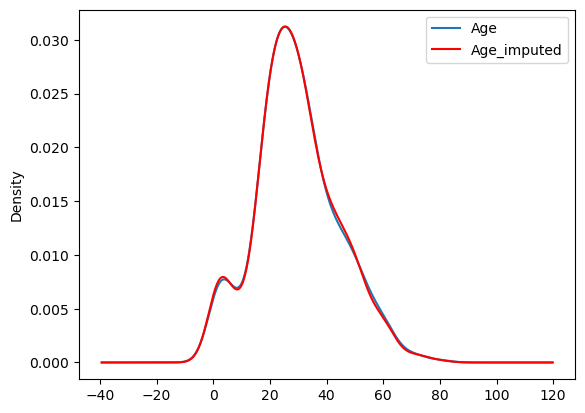

In [181]:
plotCheck()

In [183]:
X_train.corr()

,Age,Fare,Age_imputed
Age,1.000000,0.088103,1.000000
Fare,0.088103,1.000000,0.080035
Age_imputed,1.000000,0.080035,1.000000


In [185]:
X_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,60.166038
Age_imputed,210.251707,60.166038,209.240608


In [187]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  209.24060769607598


<Axes: >

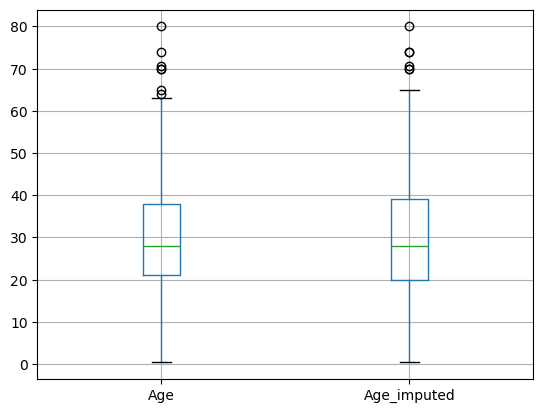

In [189]:
X_train[['Age', 'Age_imputed']].boxplot()

# Perform on Categorical Data

In [193]:
df = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df.sample()

,FireplaceQu,GarageQual,SalePrice
136,Fa,TA,143000


In [195]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [201]:
X = df
y = df['SalePrice']

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [205]:
def addImputed(X_data,col):
    X_data[f"{col}_imputed"] = X_data[col]
    mask = X_data[col].isnull()
    values = X_data[col].dropna().sample(mask.sum()).values
    X_data.loc[:,f"{col}_imputed"][mask] = values


In [247]:
addImputed(X_train,'GarageQual')
addImputed(X_test,'GarageQual')

C:\Users\aashi\AppData\Local\Temp\ipykernel_15080\3225852982.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_data.loc[:,f"{col}_imputed"][mask] = values
C:\Users\aashi\AppData\Local\Temp\ipykernel_15080\3225852982.py:5: SettingWithCopy

In [249]:
addImputed(X_train,"FireplaceQu")
addImputed(X_test,"FireplaceQu")

C:\Users\aashi\AppData\Local\Temp\ipykernel_15080\3225852982.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_data.loc[:,f"{col}_imputed"][mask] = values
C:\Users\aashi\AppData\Local\Temp\ipykernel_15080\3225852982.py:5: SettingWithCopy

In [251]:
X_train.isnull().mean()*100

FireplaceQu            46.832192
GarageQual              5.479452
SalePrice               0.000000
GarageQual_imputed      0.000000
FireplaceQu_imputed     0.000000
dtype: float64

In [253]:
def checkPlotCategorical(col,against):
    plt.figure(figsize=(14,4))
    columns = X_train[f"{col}_imputed"].unique()
    ax1 = plt.subplot(121)
    for i in columns:
        X_train[X_train[col]==i][against].plot(kind='kde')
    lines, labels = ax1.get_legend_handles_labels()
    labels = columns
    ax1.set_title("Original")
    ax1.legend(lines, labels, loc='best')

    ax2 = plt.subplot(122)
    for i in columns:
        X_train[X_train[f"{col}_imputed"]==i][against].plot(kind='kde')
    lines, labels = ax2.get_legend_handles_labels()
    labels = columns
    ax2.set_title("Imputed")
    ax2.legend(lines, labels, loc='best')

    plt.show()

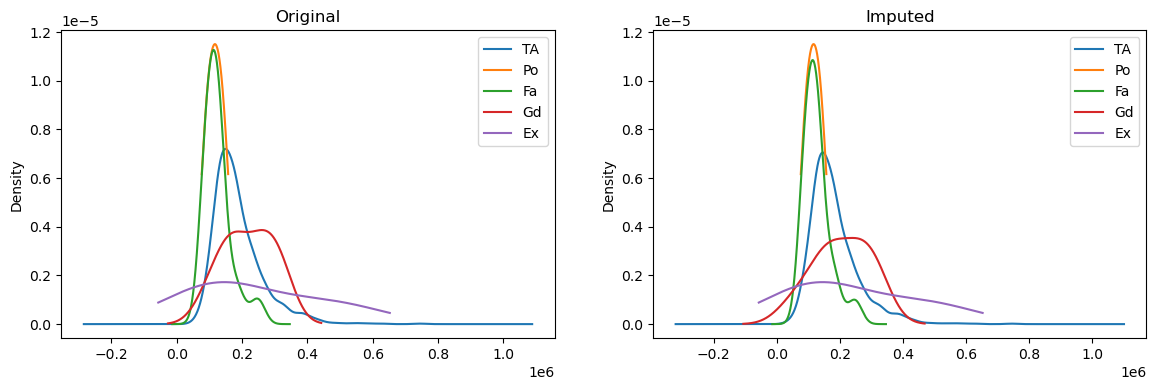

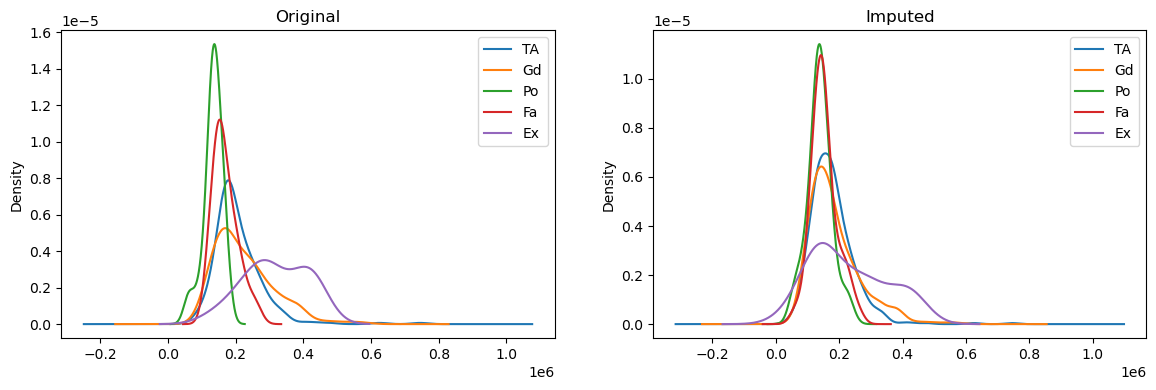

In [255]:
# col = "GarageQual"
# X_train[col]=='TA'
checkPlotCategorical("GarageQual","SalePrice")
checkPlotCategorical("FireplaceQu","SalePrice")

In [261]:
def valueRatio(col):
    temp = pd.concat(
        [
            X_train[col].value_counts() / len(X_train[col].dropna()),
            X_train[f"{col}_imputed"].value_counts() / len(X_train)
        ],
        axis=1)

    temp.columns = ['original', 'imputed']
    print(temp)

In [263]:
valueRatio("GarageQual")

    original   imputed
TA  0.951087  0.951199
Fa  0.032609  0.032534
Gd  0.011775  0.011986
Ex  0.002717  0.002568
Po  0.001812  0.001712


In [265]:
valueRatio("FireplaceQu")

    original   imputed
Gd  0.491143  0.490582
TA  0.405797  0.405822
Fa  0.043478  0.043664
Ex  0.033816  0.034247
Po  0.025765  0.025685
